In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# PCA

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
x=iris.data
y=iris.target

In [5]:
from sklearn.decomposition import PCA

### Step 1. 開PCA機

In [6]:
pca=PCA(n_components=2)

### Step 2.訓練

In [7]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### Step 3.預測

In [8]:
x[87]

array([6.3, 2.3, 4.4, 1.3])

In [9]:
X=pca.transform(x)

In [10]:
X[87] ###變二維了

array([ 0.81509524, -0.37203706])

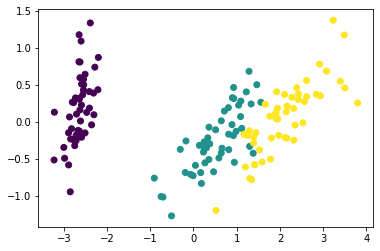

In [11]:
plt.scatter(X[:,0],X[:,1],c=y)

### 準備訓練/測試資料

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 
###random_state其實可以隨便設

### Step 1.開SVC函數學習機

In [14]:
from sklearn.svm import SVC

In [15]:
clf=SVC()

### Step 2.訓練

In [16]:
clf.fit(x_train,y_train) ###輸入x_train,輸出y_train

/Users/Zalman/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Step 3.預測

In [17]:
y_predict=clf.predict(x_test)

In [18]:
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

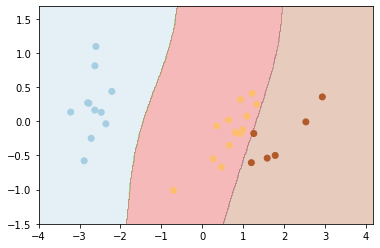

In [19]:
x0=np.arange(-4,4.2,0.02)
y0=np.arange(-1.5,1.7,0.02)

xm,ym=np.meshgrid(x0,y0)
P=np.c_[xm.ravel(),ym.ravel()]
z=clf.predict(P)
Z=z.reshape(xm.shape)
plt.contourf(xm,ym,Z,alpha=0.3,cmap='Paired')
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap='Paired')

# K-Means自動分類

In [20]:
x=np.random.rand(100,2)

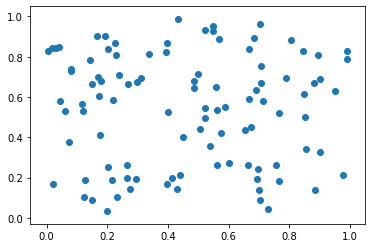

In [21]:
plt.scatter(x[:,0],x[:,1])

### Step 1.打開K-Means學習機

In [22]:
from sklearn.cluster import KMeans

In [23]:
clf=KMeans(n_clusters=3) ###分三類

### Step 2.訓練

In [24]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Step 3.預測

In [25]:
clf.predict(x)

array([0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 0, 2, 1, 2,
       0, 2, 2, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2, 2, 2,
       2, 1, 0, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 0], dtype=int32)

In [26]:
clf.labels_

array([0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 0, 2, 1, 2,
       0, 2, 2, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2, 2, 2,
       2, 1, 0, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 0], dtype=int32)

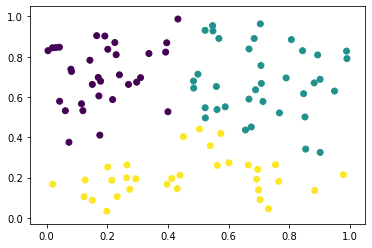

In [27]:
plt.scatter(x[:,0],x[:,1],c=clf.labels_)

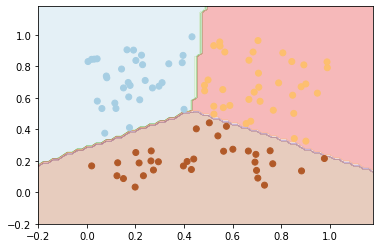

In [28]:
x0=y0=np.arange(-0.2,1.2,0.02)###-0.2到1.2每隔0,02取一點
xm,ym=np.meshgrid(x0,y0)

P=np.c_[xm.ravel(),ym.ravel()]
z=clf.predict(P)
Z=z.reshape(xm.shape)
plt.contourf(xm,ym,Z,alpha=0.3,cmap='Paired')
plt.scatter(x[:,0],x[:,1],c=clf.labels_,cmap='Paired')

## 'make_blobs'生成更像真實世界的數據

In [29]:
from sklearn.datasets.samples_generator import make_blobs

In [30]:
x,y=make_blobs(n_samples=500,centers=3,n_features=2,random_state=0)

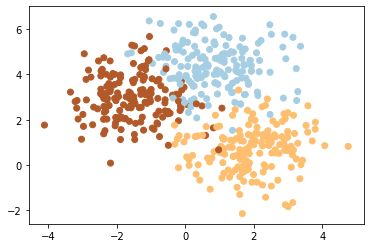

In [31]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='Paired')

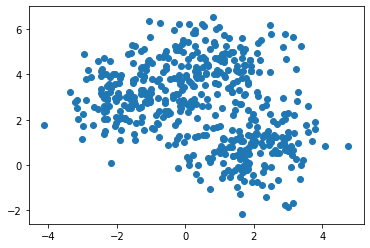

In [32]:
plt.scatter(x[:,0],x[:,1])

### Step 1.打開K-Means函數學習機

In [33]:
clf=KMeans(n_clusters=3) 

### Step2.訓練

In [34]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Step 3.預測

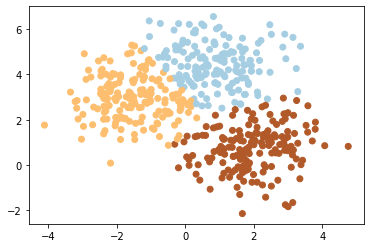

In [35]:
plt.scatter(x[:,0],x[:,1],c=clf.labels_,cmap='Paired')

# Mean-Shifts完全自動分類

### Step 1.打開函數學習機

In [36]:
from sklearn.cluster import MeanShift

In [37]:
clf=MeanShift()

### Step 2.訓練

In [38]:
clf.fit(x)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

### Step 3.預測

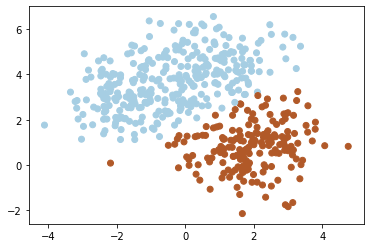

In [39]:
plt.scatter(x[:,0],x[:,1],c=clf.labels_,cmap='Paired')

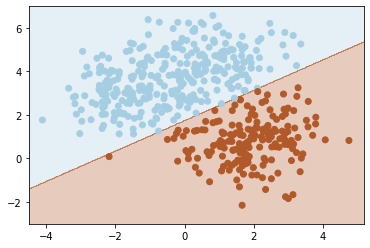

In [40]:
x0=np.arange(-4.5,5.2,0.02)
y0=np.arange(-3,7,0.02)

xm,ym=np.meshgrid(x0,y0)
P=np.c_[xm.ravel(),ym.ravel()]
z=clf.predict(P)
Z=z.reshape(xm.shape)

plt.contourf(xm,ym,Z,alpha=0.3,cmap='Paired')
plt.scatter(x[:,0],x[:,1],c=clf.labels_,cmap='Paired')

# cross_val_score

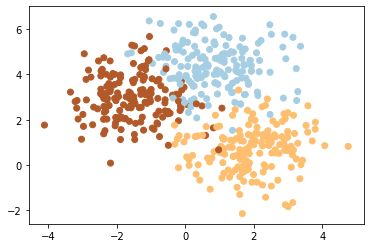

In [41]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='Paired')

In [42]:
from sklearn.model_selection import cross_val_score

# SVC

In [43]:
from sklearn.svm import SVC

In [44]:
clf=SVC(gamma='auto')

In [45]:
scores=cross_val_score(clf,x,y,cv=5)

In [46]:
scores

array([0.94117647, 0.94059406, 0.98989899, 0.90909091, 0.92929293])

In [47]:
scores.max()

0.98989898989899

In [48]:
scores.mean()

0.9420106716554008

# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
clf=DecisionTreeClassifier()

In [51]:
scores=cross_val_score(clf,x,y,cv=5)

In [52]:
scores.max()

0.9494949494949495

In [53]:
scores.mean()

0.9120264967673238

# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
clf=RandomForestClassifier(n_estimators=100)

In [56]:
scores=cross_val_score(clf,x,y,cv=5)

In [57]:
scores

array([0.92156863, 0.92079208, 0.96969697, 0.90909091, 0.88888889])